## run this cell before starting spark cluster connection (corrects module error)

In [1]:
import os
print os.environ['PYSPARK_PYTHON']
os.environ['PYSPARK_PYTHON']=os.environ['LCG_VIEW'] + '/bin/python'
print os.environ['PYSPARK_PYTHON']

/etc/spark/python
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/bin/python


### Import necessary spark and python stuff

In [2]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import from_json
from pyspark.ml.feature import VectorAssembler

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### select the data

In [4]:
df = spark.read.json("/user/rucio01/traces/traces.2018-04*")

### Create temporary table view

In [5]:
# body_schema = spark.read.json(df_loadAvg.rdd.map(lambda row: row.body)).schema
df.createOrReplaceTempView("traces")

### set Pandas Options

In [6]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1900)
pd.set_option('display.max_columns', None)

### query user and official data (excluding pilot and None-existing Datasets)

In [7]:
df_ps = spark.sql("SELECT *\
                   FROM traces \
                   WHERE eventType=='download' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot'")\

In [8]:
df_ps.describe().toPandas()

summary  account appid catStart   clientState  \
0  count   8135296  0     0        8135296        
1  mean    None     None  None     None           
2  stddev  None     None  None     None           
3  min     aad      None  None     ALREADY_DONE   
4  max     zzheng   None  None     TypeError      

                                                                                 dataset  \
0  8135296                                                                                 
1  None                                                                                    
2  None                                                                                    
3  BBS_M1000_nominal_100418                                                                
4  valid3.110401.PowhegPythia_P2012_ttbar_nonallhad.simul.log.e2928_s3213_tid12503332_00   

  datasetName datasetScope  dataset_scope  duid eventType        eventVersion  \
0  0           8134934      362            0     8135296   8135296              
1  None        None         None           None  None      None                 
2  None        None         None           None  None      None                 
3  None        cond09_mc    user.mlassnig  None  download  1.13.2               
4  None        valid3       user.mlassnig  None  download  webui_1.15.3.post1   

                           filename             filesize  guid  \
0  8126479                           8135296              0      
1  None                              2.632265877515541E8  None   
2  None                              9.639216701652389E8  None   
3  AOD.05371635._000001.pool.root.1  10000                None   
4  wjets_v1.15_small.root            999995790            None   

                      hostname    ip localSite  \
0  8135294                      0     0          
1  None                         None  None       
2  None                         None  None       
3  130-199-21-196.dhcp.bnl.gov  None  None       
4  xenia2.nevis.columbia.edu    None  None       

                                                                                            name  \
0  8817                                                                                            
1  None                                                                                            
2  None                                                                                            
3  AOD.11189316._000046.pool.root.1                                                                
4  user.wichan.361108.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Ztautau.13886366._000002.hist-output.root   

     pq protocol relativeStart                remoteSite      scope  \
0  0     3242568  0             3242568                   8135296     
1  None  None     None          None                      None        
2  None  None     None          None                      None        
3  None  davs     None          AGLT2_CALIBDISK           cond09_mc   
4  None  srm      None          ZA-WITS-CORE_SCRATCHDISK  valid3      

  stateReason suspicious taskid timeEnd timeStart  \
0  0           0          0      0       0          
1  None        None       None   None    None       
2  None        None       None   None    None       
3  None        None       None   None    None       
4  None        None       None   None    None       

                            traceId  \
0  8135296                            
1  Infinity                           
2  NaN                                
3  00000900028d4eb3be0fc3f4f2af3bbe   
4  fffffe7773224414bbea93f700d89778   

                                     traceIp              traceTimeentry  \
0  8135296                                    8135296                      
1  None                                       None                         
2  None                                       None                         
3  118.209.77.222, 2001:1458:201:e3::100:155  2018-03-31T22:00:01.29232

### query only official data (excluding pilot and None-existing Datasets)

In [9]:
df_ps_official = spark.sql("SELECT *\
                   FROM traces \
                   WHERE eventType=='download' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')")\

In [10]:
df_ps_official.describe().toPandas()

summary  account appid catStart     clientState  \
0  count   1645429  0     0        1645429          
1  mean    None     None  None     None             
2  stddev  None     None  None     None             
3  min     aagaard  None  None     ALREADY_DONE     
4  max     zzheng   None  None     SourceNotFound   

                                                                                               dataset  \
0  1645429                                                                                               
1  None                                                                                                  
2  None                                                                                                  
3  data10_hi.00169927.physics_bulk.ROOT.NTUP_HI.r2111_p456                                               
4  mc16_valid.423105.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP280_500.merge.AOD.e5094_s3238_r10441_r10210   

  datasetName datasetScope dataset_scope  duid eventType        eventVersion  \
0  0           1645429      0             0     1645429   1645429              
1  None        None         None          None  None      None                 
2  None        None         None          None  None      None                 
3  None        data10_hi    None          None  download  1.13.2               
4  None        mc16_valid   None          None  download  webui_1.15.3.post1   

                             filename             filesize  guid  \
0  1636613                             1645429              0      
1  None                                4.355816524575439E8  None   
2  None                                9.552546917808487E8  None   
3  AOD.05371635._000001.pool.root.1    10000                None   
4  log.13787275._000072.job.log.tgz.1  999995790            None   

                   hostname    ip localSite  \
0  1645427                   0     0          
1  None                      None  None       
2  None                      None  None       
3  ReCaS-ui-01.cs.infn.it    None  None       
4  xenia.nevis.columbia.edu  None  None       

                                       name    pq protocol relativeStart  \
0  8816                                      0     790748   0              
1  None                                      None  None     None           
2  None                                      None  None     None           
3  AOD.11189316._000046.pool.root.1          None  davs     None           
4  NTUP_PILEUP.13122740._000002.pool.root.1  None  srm      None           

              remoteSite       scope stateReason suspicious taskid timeEnd  \
0  790748                 1645429     0           0          0      0        
1  None                   None        None        None       None   None     
2  None                   None        None        None       None   None     
3  AGLT2_CALIBDISK        data10_hi   None        None       None   None     
4  ZA-WITS-CORE_PRODDISK  mc16_valid  None        None       None   None     

  timeStart                           traceId  \
0  0         1645429                            
1  None      Infinity                           
2  None      NaN                                
3  None      00000900028d4eb3be0fc3f4f2af3bbe   
4  None      fffffab6d2724e45a542fc4b19bd96e1   

                                     traceIp              traceTimeentry  \
0  1645429                                    1645429                      
1  None                                       None                         
2  None                                       None                         
3  118.209.77.222, 2001:1458:201:e3::100:155  2018-03-31T22:04:00.149492   
4  ::ffff:95.103.58.33                        2018-04-30T21:59:46.283086   

     traceTimeentryUnix           transferEnd        transferStart   url  \
0  1645429               1449949               1645427              0      
1  1.5236543724599578E9  1.5236287272248893

### drop columns that do not contain any values (or very little values, like 'name') based on previous describe()

In [11]:
df_ps = df_ps.drop('appid', 'catStart', 'datasetName', 'dataset_scope', 'duid', 
                   'guid', 'ip', 'localSite', 'pq', 'relativeStart', 'stateReason', 
                   'suspicious', 'taskid', 'timeEnd', 'timeStart', 'url', 'usr', 
                   'usrdn', 'validateStart', 'version', 'name')

In [12]:
df_ps_official = df_ps_official.drop('appid', 'catStart', 'datasetName', 'dataset_scope', 'duid', 
                   'guid', 'ip', 'localSite', 'pq', 'relativeStart', 'stateReason', 
                   'suspicious', 'taskid', 'timeEnd', 'timeStart', 'url', 'usr', 
                   'usrdn', 'validateStart', 'version', 'name')

In [13]:
#df_ps = df_ps.dropna()

### Split dataset column according to schema for official data

In [14]:
split_col = split(df_ps_official['dataset'], "\.")
df_ps_official = df_ps_official.withColumn('project', split_col.getItem(0))
df_ps_official = df_ps_official.withColumn('run_number', split_col.getItem(1))
df_ps_official = df_ps_official.withColumn('stream_name', split_col.getItem(2))
df_ps_official = df_ps_official.withColumn('prod_step', split_col.getItem(3))
df_ps_official = df_ps_official.withColumn('datatype', split_col.getItem(4))
df_ps_official = df_ps_official.withColumn('dataset_version', split_col.getItem(5))

In [15]:
df_ps_official.describe().toPandas()

summary  account     clientState  \
0  count   1645429  1645429          
1  mean    None     None             
2  stddev  None     None             
3  min     aagaard  ALREADY_DONE     
4  max     zzheng   SourceNotFound   

                                                                                               dataset  \
0  1645429                                                                                               
1  None                                                                                                  
2  None                                                                                                  
3  data10_hi.00169927.physics_bulk.ROOT.NTUP_HI.r2111_p456                                               
4  mc16_valid.423105.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP280_500.merge.AOD.e5094_s3238_r10441_r10210   

  datasetScope eventType        eventVersion  \
0  1645429      1645429   1645429              
1  None         None      None                 
2  None         None      None                 
3  data10_hi    download  1.13.2               
4  mc16_valid   download  webui_1.15.3.post1   

                             filename             filesize  \
0  1636613                             1645429               
1  None                                4.355816524575439E8   
2  None                                9.552546917808465E8   
3  AOD.05371635._000001.pool.root.1    10000                 
4  log.13787275._000072.job.log.tgz.1  999995790             

                   hostname protocol             remoteSite       scope  \
0  1645427                   790748   790748                 1645429      
1  None                      None     None                   None         
2  None                      None     None                   None         
3  ReCaS-ui-01.cs.infn.it    davs     AGLT2_CALIBDISK        data10_hi    
4  xenia.nevis.columbia.edu  srm      ZA-WITS-CORE_PRODDISK  mc16_valid   

                            traceId  \
0  1645429                            
1  Infinity                           
2  NaN                                
3  00000900028d4eb3be0fc3f4f2af3bbe   
4  fffffab6d2724e45a542fc4b19bd96e1   

                                     traceIp              traceTimeentry  \
0  1645429                                    1645429                      
1  None                                       None                         
2  None                                       None                         
3  118.209.77.222, 2001:1458:201:e3::100:155  2018-03-31T22:04:00.149492   
4  ::ffff:95.103.58.33                        2018-04-30T21:59:46.283086   

    traceTimeentryUnix          transferEnd         transferStart  \
0  1645429              1449949              1645427                
1  1.523654372459961E9  1.523628727224893E9  1.5236543424631588E9   
2  633084.3400204376    632410.5772978412    633076.5233320321      
3  1.522533840149492E9  1.522533839115711E9  1.522527378084161E9    
4  1.525125586283086E9  1.525125586189065E9  1.525125342411194E9    

                               uuid     project         run_number  \
0  1645429                           1645429     1645429             
1  None                              None        346682.429148734    
2  None                              None        55703.76294815913   
3  0000242e549a4eff938e139286083a61  data10_hi   00169927            
4  ffff4fc350e24a83b6c082837d70776e  mc16_valid  periodM             

                                    stream_name prod_step datatype  \
0  1645429                                       1645429   1645429   
1  None                                          None      None      
2  None                                          None      None      
3  AcerMCPythia_P2011CCTEQ6L1_singletop_tchan_l  PhysCont  AOD       
4  physics_bulk                                  simul     log       

  dataset_version  
0  1639132         
1  None            
2  None       

### Count dataset hits and join hits column to tables

In [16]:
df_ps_counts = spark.sql("SELECT filename AS filename_counts, count(*) as hits \
                          FROM traces \
                          WHERE eventType=='download' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot'\
                          GROUP BY  filename \
                          ORDER BY 2 DESC")

In [17]:
df_ps_counts.createOrReplaceTempView("counts")
df_ps.createOrReplaceTempView("df_ps")
df_ps_official.createOrReplaceTempView("df_ps_official")

In [18]:
df_ps_merged = spark.sql("SELECT * \
                          FROM df_ps \
                          INNER JOIN counts ON df_ps.filename = counts.filename_counts")

In [19]:
df_ps_merged_official = spark.sql("SELECT * \
                          FROM df_ps_official \
                          INNER JOIN counts ON df_ps_official.filename = counts.filename_counts")

In [20]:
df_ps_merged = df_ps_merged.drop('filename_counts')
df_ps_merged_official = df_ps_merged_official.drop('filename_counts')

In [21]:
# refresh merged view so that all columns are in it
df_ps_merged.createOrReplaceTempView("merged")
df_ps_merged_official.createOrReplaceTempView("merged_official")

In [22]:
df_ps_merged.describe().toPandas()

summary  account   clientState  \
0  count   8126479  8126479        
1  mean    None     None           
2  stddev  None     None           
3  min     aad      ALREADY_DONE   
4  max     zzheng   TypeError      

                                                                                 dataset  \
0  8126479                                                                                 
1  None                                                                                    
2  None                                                                                    
3  BBS_M1000_nominal_100418                                                                
4  valid3.110401.PowhegPythia_P2012_ttbar_nonallhad.simul.log.e2928_s3213_tid12503332_00   

  datasetScope eventType        eventVersion  \
0  8126117      8126479   8126479              
1  None         None      None                 
2  None         None      None                 
3  cond09_mc    download  1.13.2               
4  valid3       download  webui_1.15.3.post1   

                           filename              filesize  \
0  8126479                           8126479                
1  None                              2.6347497281527376E8   
2  None                              9.643639676018045E8    
3  AOD.05371635._000001.pool.root.1  10000                  
4  wjets_v1.15_small.root            999995790              

                      hostname protocol                remoteSite      scope  \
0  8126477                      3233751  3233751                   8126479     
1  None                         None     None                      None        
2  None                         None     None                      None        
3  130-199-21-196.dhcp.bnl.gov  davs     AGLT2_CALIBDISK           cond09_mc   
4  xenia2.nevis.columbia.edu    srm      ZA-WITS-CORE_SCRATCHDISK  valid3      

                            traceId  \
0  8126479                            
1  Infinity                           
2  NaN                                
3  00000900028d4eb3be0fc3f4f2af3bbe   
4  fffffe7773224414bbea93f700d89778   

                                     traceIp              traceTimeentry  \
0  8126479                                    8126479                      
1  None                                       None                         
2  None                                       None                         
3  118.209.77.222, 2001:1458:201:e3::100:155  2018-03-31T22:00:01.292328   
4  ::ffff:95.103.58.33                        2018-04-30T21:59:59.475342   

     traceTimeentryUnix           transferEnd        transferStart  \
0  8126479               7580516               8124296               
1  1.5236640270581465E9  1.5236533475367296E9  1.523663897922576E9   
2  741744.1961293769     745147.5537094874     741810.5303458814     
3  1.522533601292328E9   1.522533601847934E9   1.522161763565083E9   
4  1.525125599475342E9   1.52512559944624E9    1.525125599446239E9   

                               uuid               hits  
0  8126479                           8126479            
1  None                              41.29550165576014  
2  None                              85.78386259604257  
3  0000031e09774991a7507fbda693bc29  1                  
4  ffffd9d807914027b7452617e4480e5c  1360

In [23]:
df_ps_merged_official.describe().toPandas()

summary  account     clientState  \
0  count   1636613  1636613          
1  mean    None     None             
2  stddev  None     None             
3  min     aagaard  ALREADY_DONE     
4  max     zzheng   SourceNotFound   

                                                                                               dataset  \
0  1636613                                                                                               
1  None                                                                                                  
2  None                                                                                                  
3  data10_hi.00169927.physics_bulk.ROOT.NTUP_HI.r2111_p456                                               
4  mc16_valid.423105.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP280_500.merge.AOD.e5094_s3238_r10441_r10210   

  datasetScope eventType        eventVersion  \
0  1636613      1636613   1636613              
1  None         None      None                 
2  None         None      None                 
3  data10_hi    download  1.13.2               
4  mc16_valid   download  webui_1.15.3.post1   

                             filename             filesize  \
0  1636613                             1636613               
1  None                                4.37743497648141E8    
2  None                                9.571137357013341E8   
3  AOD.05371635._000001.pool.root.1    10000                 
4  log.13787275._000072.job.log.tgz.1  999995790             

                   hostname protocol             remoteSite       scope  \
0  1636611                   781932   781932                 1636613      
1  None                      None     None                   None         
2  None                      None     None                   None         
3  ReCaS-ui-01.cs.infn.it    davs     AGLT2_CALIBDISK        data10_hi    
4  xenia.nevis.columbia.edu  srm      ZA-WITS-CORE_PRODDISK  mc16_valid   

                            traceId  \
0  1636613                            
1  Infinity                           
2  NaN                                
3  00000900028d4eb3be0fc3f4f2af3bbe   
4  fffffab6d2724e45a542fc4b19bd96e1   

                                     traceIp              traceTimeentry  \
0  1636613                                    1636613                      
1  None                                       None                         
2  None                                       None                         
3  118.209.77.222, 2001:1458:201:e3::100:155  2018-03-31T22:04:00.149492   
4  ::ffff:95.103.58.33                        2018-04-30T21:59:46.283086   

     traceTimeentryUnix           transferEnd         transferStart  \
0  1636613               1441133               1636611                
1  1.5236470205752285E9  1.5236202212249155E9  1.5236469904520295E9   
2  626689.8752368886     624777.1062863632     626681.6639287445      
3  1.522533840149492E9   1.522533839115711E9   1.522527378084161E9    
4  1.525125586283086E9   1.525125586189065E9   1.525125342411194E9    

                               uuid     project          run_number  \
0  1636613                           1636613     1636613              
1  None                              None        346579.36080423446   
2  None                              None        55860.29337645421    
3  0000242e549a4eff938e139286083a61  data10_hi   00169927             
4  ffff4fc350e24a83b6c082837d70776e  mc16_valid  periodM              

                                    stream_name prod_step datatype  \
0  1636613                                       1636613   1636613   
1  None                                          None      None      
2  None                                          None      None      
3  AcerMCPythia_P2011CCTEQ6L1_singletop_tchan_l  PhysCont  AOD       
4  physics_bulk                                  simul     log       

  dataset_version                hits  
0  1630316      

## cast filesize and run_number to double

In [24]:
df_ps_final = df_ps_merged.withColumn("filesize_double",df_ps_merged.filesize.cast(DoubleType()))
df_ps_final_official = df_ps_merged_official.withColumn("filesize_double",df_ps_merged_official.filesize.cast(DoubleType()))

In [25]:
df_ps_final = df_ps_final.drop('filesize')
df_ps_final_official = df_ps_final_official.drop('filesize')

In [26]:
df_ps_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps_final.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        362           0          0              

   filename  hostname  protocol  remoteSite  scope  traceId  traceIp  \
0  0         2         4892728   4892728     0      0        0         

   traceTimeentry  traceTimeentryUnix  transferEnd  transferStart  uuid  hits  \
0  0               0                   545963       2183           0     0      

   filesize_double  
0  0

In [27]:
df_ps_final_official.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps_final_official.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        0             0          0              

   filename  hostname  protocol  remoteSite  scope  traceId  traceIp  \
0  0         2         854681    854681      0      0        0         

   traceTimeentry  traceTimeentryUnix  transferEnd  transferStart  uuid  \
0  0               0                   195480       2              0      

   project  run_number  stream_name  prod_step  datatype  dataset_version  \
0  0        0           0            0          0         6297              

   hits  filesize_double  
0  0     0

## analyse

In [28]:
df_ps_final.agg(*(countDistinct(col(c)).alias(c) for c in df_ps_final.columns)).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  896      15           162466   609           1          8              

   filename  hostname  protocol  remoteSite  scope  traceId  traceIp  \
0  2267351   1659      6         258         604    8123288  1548      

   traceTimeentry  traceTimeentryUnix  transferEnd  transferStart    uuid  \
0  8123181         8123181             7577219      8120398        712077   

   hits  filesize_double  
0  329   1781358

In [29]:
df_ps_final_official.agg(*(countDistinct(col(c)).alias(c) for c in df_ps_final_official.columns)).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  545      12           10878    24            1          6              

   filename  hostname  protocol  remoteSite  scope  traceId  traceIp  \
0  549930    372       6         166         23     1636300  355       

   traceTimeentry  traceTimeentryUnix  transferEnd  transferStart   uuid  \
0  1636249         1636249             1440702      1636137        41782   

   project  run_number  stream_name  prod_step  datatype  dataset_version  \
0  23       3557        3074         9          112       3216              

   hits  filesize_double  
0  52    488892

In [30]:
df_ps_final.createOrReplaceTempView("final")
df_ps_final_official.createOrReplaceTempView("final_official")

df_acc = spark.sql("SELECT account, count(*) \
                     FROM final \
                     GROUP BY  account \
                     ORDER BY 2 DESC").toPandas()

In [31]:
df_acc_official = spark.sql("SELECT account, count(*) \
                     FROM final_official \
                     GROUP BY  account \
                     ORDER BY 2 DESC").toPandas()

In [32]:
df_acc

account  count(1)
0    jwalder       1024981 
1    sutt          600578  
2    atlascdb      303218  
3    ichiu         250169  
4    kuno          225287  
5    tnitta        217856  
6    thompson      191335  
7    jojungge      180127  
8    pgadow        173714  
9    afray         161740  
10   iconnell      152203  
11   fspeiser      141595  
12   sthenkel      136234  
13   bochen        130478  
14   toyamaza      123413  
15   stodt         117079  
16   shuzhou       108416  
17   ftresold      103661  
18   ngrieser      102744  
19   wachan        90899   
20   abuzatu       90698   
21   mneumann      88442   
22   mgeisen       87799   
23   ggessner      80139   
24   cgutscho      72844   
25   jrawling      64321   
26   yliu          62662   
27   sparajul      60649   
28   fthiele       58428   
29   aleopold      55555   
30   omajersk      54031   
31   luambroz      52651   
32   vdao          50612   
33   nackenho      49268   
34   cylin         48035   
35   spieker       45534   
36   hod           45193   
37   judecast      45106   
38   aqureshi      44966   
39   mmichett      43752   
40   isiral        42652   
41   tphamleh      41477   
42   fsforza       40841   
43   aezhilov      40795   
44   croland       38642   
45   changqia      38592   
46   prieck        38391   
47   driss         37578   
48   pglayshe      36729   
49   scarra        33930   
50   kchoi         33877   
51   vvecchio      33301   
52   menke         31257   
53   ellingha      30294   
54   eschanet      28644   
55   vbegy         27909   
56   lhavener      26460   
57   derue         26394   
58   oabouzei      26319   
59   tadej         24688   
60   yama          23920   
61   mpettee       20302   
62   mnelson       19963   
63   fuhe          19634   
64   mepland       19254   
65   tcalvet       19137   
66   etolley       19133   
67   dantrim       18239   
68   mmadugod      18194   
69   areiss        18105   
70   valentem      17690   
71   lcorpe        17176   
72   cvergeli      16612   
73   heng          16142   
74   gtarna        16060   
75   yoyamagu      15893   
76   aad           15745   
77   ychiu         15713   
78   rnewhous      15632   
79   mverissi      15586   
80   chekanov      15443   
81   fballi        14995   
82   boyang        14879   
83   mkbugge       14479   
84   mrybar        14398   
85   kristin       14034   
86   mleblanc      13879   
87   tamartin      13713   
88   aknue         13706   
89   mblaut        13465   
90   yuhe          13337   
91   asantra       13263   
92   klimek        13195   
93   skaphle       13087   
94   msessa        12488   
95   arnaez        12052   
96   ewelina       11998   
97   rdinardo      11979   
98   solovyev      11908   
99   amirto        11849   
100  tpelzer       11806   
101  amorley       11538   
102  achomont      11317   
103  alheld        11023   
104  xingguo       10820   
105  kzavertk      10795   
106  narayan       10341   
107  ekourlit      10202   
108  pmoder        9992    
109  fawilk        9917    
110  tkunigo       9419    
111  chhan         9392    
112  hpacey        9358    
113  mcanobre      9352    
114  dkrauss       9328    
115  luadamek      8895    
116  morgens       8856    
117  egramsta      8803    
118  caminal       8754    
119  artprod       8671    
120  hmeyerzt      8580    
121  jcantero      8541    
122  zzheng        8474    
123  bcarlson      8257    
124  ggallard      8228    
125  phkoenig      8212    
126  amelo         8184    
127  fcirotto      8117    
128  hegormse      8081    
129  guindon       7991    
130  sangelid      7847    
131  yesenia       7782    
132  kkrizka       7722    
133  fernando      7716    
134  qbuat         7672    
135  acasha        7595    
136  deroy         7592    
137  iyeletsk      7529    
138  yuchengh      7362    
139  cleitgeb      7300    
140  bchargei      7274    
141  miokeefe      7258    
142  m

In [33]:
df_acc['count(1)'].sum()

8126479

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


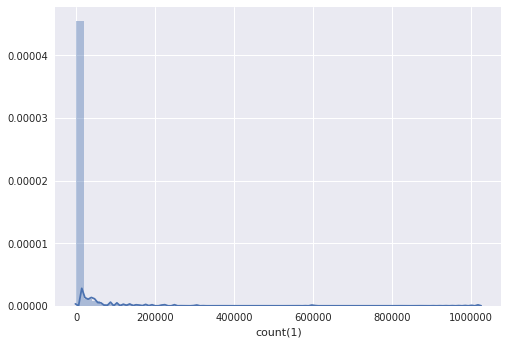

In [34]:
sns.distplot(df_acc['count(1)']);

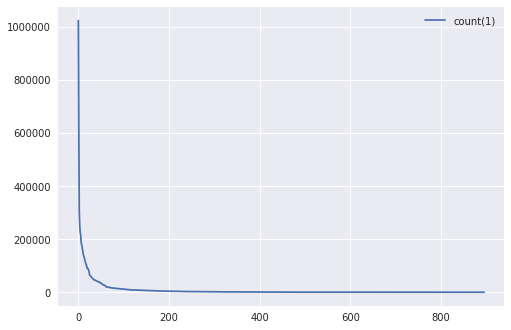

In [35]:
df_acc.plot(x=df_acc.index, y='count(1)')

In [36]:
df_acc_official

account  count(1)
0    ichiu      250169  
1    pgadow     163338  
2    jojungge   159777  
3    fspeiser   141595  
4    toyamaza   123413  
5    stodt      117079  
6    mgeisen    75577   
7    yliu       62662   
8    driss      37578   
9    kchoi      32380   
10   ellingha   30294   
11   oabouzei   25970   
12   lhavener   25640   
13   mmichett   24853   
14   isiral     20581   
15   mpettee    20074   
16   mmadugod   16982   
17   heng       16116   
18   yoyamagu   15893   
19   mkbugge    14152   
20   tamartin   13713   
21   boyang     13638   
22   ewelina    11998   
23   changqia   11832   
24   mverissi   10082   
25   mnelson    8894    
26   hmeyerzt   8580    
27   yuchengh   6829    
28   salvucci   6453    
29   hegormse   5878    
30   hatmani    5803    
31   ggallard   5063    
32   mamuzic    4850    
33   fernando   4703    
34   mazhang    4535    
35   nilang     4519    
36   kuno       4512    
37   sara       4467    
38   wenhao     4137    
39   ggessner   3965    
40   smanzoni   3909    
41   ftresold   3503    
42   hepikhar   3427    
43   rdinardo   3065    
44   sosen      2974    
45   tnobe      2922    
46   xsu        2860    
47   alarmstr   2857    
48   oda        2821    
49   mbrazick   2723    
50   lizhang    2701    
51   hod        2476    
52   gcarratt   2293    
53   finelli    2254    
54   tbold      2245    
55   ahrynevi   2205    
56   anramire   2158    
57   cgrud      2092    
58   nwhallon   2083    
59   battagl    1965    
60   ysano      1756    
61   enibigir   1644    
62   jsabater   1536    
63   dturgema   1514    
64   amirto     1472    
65   mproffit   1418    
66   xulou      1407    
67   zmeadows   1326    
68   szerradi   1274    
69   msessa     1211    
70   mcanobre   1148    
71   childers   1106    
72   tofitsch   1106    
73   ychiu      1057    
74   sekula     1049    
75   pbokan     1045    
76   yyap       980     
77   sahigash   956     
78   myamatan   949     
79   pataraia   938     
80   vpetousi   932     
81   wachan     903     
82   elasimak   896     
83   cylin      893     
84   maklein    823     
85   jpoveda    797     
86   eschanet   795     
87   fapetsch   781     
88   liuya      728     
89   dhayden    727     
90   chweber    708     
91   rnewhous   659     
92   dmori      656     
93   therwig    633     
94   bili       600     
95   pmoder     552     
96   soerdek    550     
97   jojamies   550     
98   mrybar     549     
99   rustem     539     
100  jkrzysia   535     
101  alaperto   532     
102  calpas     529     
103  fschenck   525     
104  acukierm   519     
105  kbarends   509     
106  ethorpe    493     
107  sgargiul   489     
108  martindl   476     
109  vwong      458     
110  bejaeger   448     
111  pjanus     446     
112  mepland    446     
113  dhirsch    425     
114  jgeisen    402     
115  gmarceca   390     
116  bmoser     386     
117  yilin      383     
118  aivina     367     
119  sbartkow   352     
120  cjmeyer    308     
121  lmarcocc   297     
122  ljiang     297     
123  pswiersk   256     
124  iyeletsk   256     
125  mmuskinj   255     
126  ebergeas   253     
127  battagm    250     
128  ereynold   247     
129  kyajima    244     
130  morgens    243     
131  lcorpe     241     
132  escalier   233     
133  gingrizp   231     
134  schsu      221     
135  ssolomon   217     
136  tholm      211     
137  areimer    205     
138  shion      198     
139  deroy      197     
140  susingh    189     
141  othrif     180     
142  mtoscani   177     
143  frschroe   174     
144  sutt       167     
145  kuhan      167     
146  willocq    166     
147  tuna       164     
148  caudron    164     
149  kastanas   163     
150  gtarna     161     
151  jcantero   154     
152  sthais     149     
153  vanjam     149     
154  tpelzer    147     
155  abhishek   147     
156  redelbac   146     
157  acanesse   145     
158  dantrim    137     
159  ma

In [37]:
df_acc_official['count(1)'].sum()

1636613

In [38]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'jwalder') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  DONE                7075    
1  ALREADY_DONE        1017142 
2  ServiceUnavailable  764

In [39]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'sutt') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  RSEAccessDenied     20      
1  SystemError         3       
2  DONE                38668   
3  Exception           3419    
4  ALREADY_DONE        489493  
5  ServiceUnavailable  64101   
6  SourceNotFound      2260    
7  FAIL_VALIDATE       1619    
8  OSError             995

In [40]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'atlascdb') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  DONE          47      
1  ALREADY_DONE  303171

In [78]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'ichiu') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  DONE                51830   
1  ALREADY_DONE        171016  
2  ServiceUnavailable  27323

In [79]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'kuno') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  DONE                33335   
1  Exception           27      
2  ALREADY_DONE        190697  
3  ServiceUnavailable  1178    
4  SourceNotFound      34      
5  OSError             16

In [80]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'tnitta') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  RSEAccessDenied     13      
1  DONE                115594  
2  ALREADY_DONE        93325   
3  ServiceUnavailable  6191    
4  SourceNotFound      2730    
5  OSError             3

In [81]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'thompson') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  DONE                63823   
1  ALREADY_DONE        114397  
2  ServiceUnavailable  12399   
3  SourceNotFound      343     
4  GError              373

In [82]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'jojungge') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  DONE                11000   
1  ALREADY_DONE        167552  
2  ServiceUnavailable  1569    
3  SourceNotFound      6

In [83]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'pgadow') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  DONE                58182   
1  ALREADY_DONE        115409  
2  ServiceUnavailable  86      
3  SourceNotFound      37

In [84]:
spark.sql("SELECT clientState, count(*) \
                    FROM ( \
                        SELECT * \
                        FROM final \
                        WHERE account == 'afray') \
                    GROUP BY clientState").toPandas()

clientState  count(1)
0  DONE                67281   
1  ALREADY_DONE        73485   
2  ServiceUnavailable  19847   
3  SourceNotFound      1126    
4  FAIL_VALIDATE       1

In [85]:
df_acc_cleaned_pd = spark.sql("SELECT account, count(*) \
           FROM final \
           WHERE clientState != 'ALREADY_DONE' \
           GROUP BY  account \
           ORDER BY 2 DESC").toPandas()

In [86]:
df_acc_cleaned_pd

account  count(1)
0    tnitta        124531  
1    sutt          111085  
2    shuzhou       108416  
3    afray         88255   
4    fspeiser      80870   
5    bochen        79909   
6    ichiu         79153   
7    thompson      76938   
8    wachan        68271   
9    sthenkel      60425   
10   jrawling      59364   
11   stodt         59208   
12   pgadow        58305   
13   mgeisen       56445   
14   ngrieser      52316   
15   aleopold      49324   
16   cgutscho      46613   
17   cylin         44707   
18   mmichett      43752   
19   ftresold      40985   
20   mneumann      38874   
21   toyamaza      38645   
22   changqia      37783   
23   aezhilov      35389   
24   kuno          34590   
25   abuzatu       33114   
26   nackenho      32673   
27   tphamleh      32143   
28   sparajul      28371   
29   vbegy         27909   
30   kchoi         26500   
31   lhavener      26342   
32   aqureshi      25779   
33   judecast      24129   
34   isiral        22415   
35   spieker       19249   
36   tcalvet       19137   
37   ellingha      18782   
38   dantrim       18239   
39   mmadugod      18194   
40   iconnell      17050   
41   prieck        15959   
42   yoyamagu      15743   
43   luambroz      15733   
44   mverissi      15586   
45   vvecchio      15013   
46   fballi        14995   
47   fthiele       14930   
48   boyang        14624   
49   yliu          14370   
50   mpettee       14281   
51   mleblanc      13879   
52   croland       13517   
53   yuhe          13295   
54   asantra       13263   
55   jojungge      12575   
56   mnelson       12509   
57   mblaut        12485   
58   yama          12188   
59   cvergeli      12096   
60   lcorpe        12007   
61   ewelina       11998   
62   pglayshe      11244   
63   heng          11212   
64   msessa        11105   
65   solovyev      10998   
66   kzavertk      10795   
67   tadej         10732   
68   fsforza       10458   
69   narayan       9963    
70   menke         9744    
71   tpelzer       8640    
72   artprod       8566    
73   zzheng        8380    
74   bcarlson      8256    
75   rdinardo      8231    
76   ekourlit      8064    
77   amelo         8030    
78   jwalder       7839    
79   oabouzei      7789    
80   areiss        7776    
81   aad           7668    
82   phkoenig      7569    
83   iyeletsk      7529    
84   acasha        7515    
85   yuchengh      7347    
86   miokeefe      7199    
87   nibrahim      6753    
88   mgrandi       6711    
89   egramsta      6672    
90   mkbugge       6619    
91   fernando      6583    
92   mcanobre      6536    
93   hmeyerzt      6519    
94   mazhang       6213    
95   dpyatiiz      6211    
96   mrybar        6166    
97   ggallard      6128    
98   hatmani       6063    
99   amorley       5997    
100  caminal       5966    
101  awebb         5848    
102  eschanet      5789    
103  tamartin      5751    
104  tofitsch      5743    
105  omajersk      5743    
106  rzou          5738    
107  mbarboy       5725    
108  deroy         5711    
109  hod           5684    
110  gcabras       5626    
111  xingguo       5605    
112  amirto        5599    
113  guindon       5531    
114  jcantero      5493    
115  derue         5484    
116  cpollard      5389    
117  salvucci      5377    
118  achomont      5285    
119  pmoder        5270    
120  mamuzic       5068    
121  tkaji         5063    
122  fawilk        4836    
123  skaphle       4824    
124  ychiu         4806    
125  cleitgeb      4770    
126  rnewhous      4712    
127  alarmstr      4695    
128  yesenia       4646    
129  pataraia      4614    
130  msulliva      4604    
131  psvirin       4591    
132  mbaugh        4526    
133  sara          4480    
134  nilang        4392    
135  qbuat         4372    
136  jsabater      4296    
137  hcheng        4278    
138  mepland       4213    
139  tlyubush      4070    
140  valentem      4024    
141  driss         3998    
142  a

In [87]:
df_acc_cleaned_pd['count(1)'].sum()

3233751

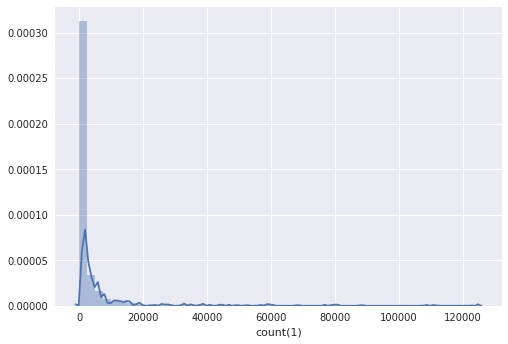

In [88]:
sns.distplot(df_acc_cleaned_pd['count(1)']);

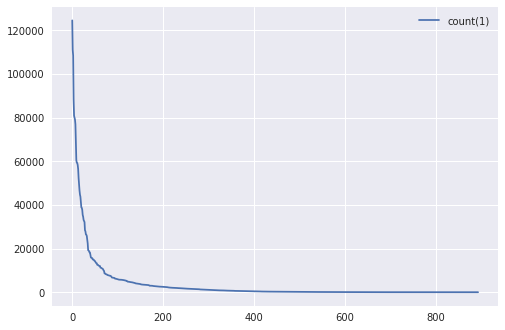

In [89]:
df_acc_cleaned_pd.plot(x=df_acc_cleaned_pd.index, y='count(1)')

In [90]:
df_acc_official_cleaned_pd = spark.sql("SELECT account, count(*) \
                     FROM final_official \
                     WHERE clientState != 'ALREADY_DONE' \
                     GROUP BY  account \
                     ORDER BY 2 DESC").toPandas()

In [91]:
df_acc_official_cleaned_pd

account  count(1)
0    fspeiser   80870   
1    ichiu      79153   
2    stodt      59208   
3    pgadow     54853   
4    mgeisen    44225   
5    toyamaza   38645   
6    lhavener   25640   
7    kchoi      25003   
8    mmichett   24853   
9    ellingha   18782   
10   mmadugod   16982   
11   yoyamagu   15743   
12   yliu       14370   
13   mpettee    14054   
14   boyang     13383   
15   ewelina    11998   
16   isiral     11904   
17   changqia   11832   
18   heng       11186   
19   mverissi   10082   
20   mnelson    8800    
21   oabouzei   7583    
22   jojungge   7394    
23   yuchengh   6829    
24   hmeyerzt   6519    
25   mkbugge    6292    
26   hatmani    5803    
27   tamartin   5751    
28   salvucci   5373    
29   mamuzic    4850    
30   fernando   4703    
31   sara       4467    
32   nilang     4392    
33   mazhang    4375    
34   driss      3998    
35   ftresold   3503    
36   ggallard   3473    
37   hepikhar   3427    
38   hegormse   3238    
39   rdinardo   3065    
40   sosen      2974    
41   tnobe      2922    
42   oda        2821    
43   alarmstr   2719    
44   mbrazick   2587    
45   wenhao     2512    
46   smanzoni   2345    
47   gcarratt   2291    
48   finelli    2254    
49   anramire   2078    
50   lizhang    1939    
51   ggessner   1785    
52   ysano      1756    
53   ahrynevi   1744    
54   enibigir   1644    
55   jsabater   1536    
56   cgrud      1456    
57   zmeadows   1326    
58   szerradi   1268    
59   amirto     1168    
60   xulou      1159    
61   xsu        1154    
62   mcanobre   1148    
63   nwhallon   1108    
64   tofitsch   1106    
65   battagl    1068    
66   pbokan     1045    
67   ychiu      1031    
68   tbold      1005    
69   sekula     951     
70   pataraia   938     
71   vpetousi   932     
72   elasimak   896     
73   wachan     893     
74   cylin      893     
75   dturgema   861     
76   maklein    823     
77   childers   812     
78   eschanet   795     
79   sahigash   788     
80   fapetsch   781     
81   yyap       757     
82   dhayden    727     
83   liuya      727     
84   chweber    708     
85   mproffit   687     
86   dmori      656     
87   hod        624     
88   bili       600     
89   pmoder     552     
90   jojamies   550     
91   soerdek    550     
92   mrybar     548     
93   rustem     537     
94   alaperto   532     
95   calpas     529     
96   jkrzysia   529     
97   fschenck   525     
98   acukierm   519     
99   rnewhous   499     
100  ethorpe    493     
101  sgargiul   489     
102  martindl   476     
103  bejaeger   448     
104  therwig    436     
105  dhirsch    425     
106  jpoveda    420     
107  msessa     417     
108  myamatan   406     
109  jgeisen    402     
110  bmoser     386     
111  yilin      383     
112  gmarceca   371     
113  sbartkow   352     
114  kbarends   349     
115  pjanus     324     
116  lmarcocc   297     
117  cjmeyer    281     
118  aivina     269     
119  pswiersk   256     
120  iyeletsk   256     
121  ebergeas   253     
122  vwong      252     
123  mepland    248     
124  ereynold   246     
125  morgens    243     
126  kyajima    239     
127  lcorpe     237     
128  escalier   233     
129  gingrizp   231     
130  battagm    223     
131  schsu      221     
132  ssolomon   217     
133  tholm      211     
134  areimer    205     
135  susingh    189     
136  deroy      188     
137  mmuskinj   182     
138  othrif     180     
139  mtoscani   177     
140  frschroe   174     
141  kuhan      167     
142  sutt       167     
143  tuna       164     
144  caudron    163     
145  kastanas   162     
146  gtarna     161     
147  jcantero   152     
148  shion      149     
149  sthais     149     
150  vanjam     148     
151  redelbac   146     
152  acanesse   145     
153  tpelzer    142     
154  dantrim    137     
155  vkitali    134     
156  mmontell   134     
157  casadop    129     
158  willocq    129     
159  mc

In [92]:
df_acc_official_cleaned_pd['count(1)'].sum()

781932

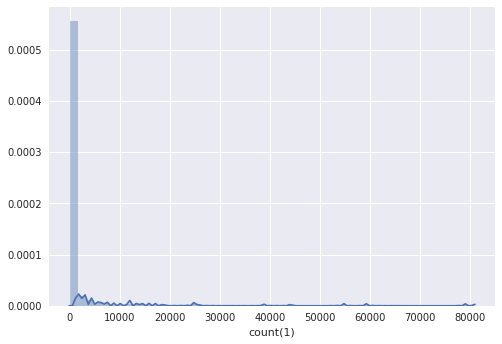

In [93]:
sns.distplot(df_acc_official_cleaned_pd['count(1)']);

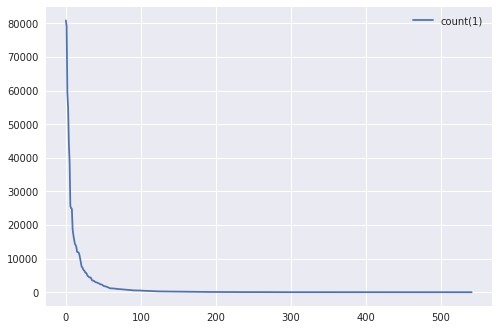

In [94]:
df_acc_official_cleaned_pd.plot(x=df_acc_official_cleaned_pd.index, y='count(1)')

## Get initial and cleaned distribution of hit amounts

In [95]:
df_hits_NOT_cleaned = spark.sql("SELECT hits, count(*) \
                     FROM final \
                     GROUP BY  hits \
                     ORDER BY 2 DESC")
df_hits_NOT_cleaned_pd = df_hits_NOT_cleaned.toPandas()
pd_sorted_NOT_cleaned_pd = df_hits_NOT_cleaned_pd.sort_values('hits')
pd_sorted_NOT_cleaned_pd['cumsum'] = pd_sorted_NOT_cleaned_pd['count(1)'].cumsum(axis=0)
pd_sorted_NOT_cleaned_pd

hits  count(1)   cumsum
1    1     988469    988469 
0    2     1060588   2049057
2    3     697221    2746278
3    4     612240    3358518
5    5     403750    3762268
4    6     492012    4254280
6    7     334950    4589230
7    8     249784    4839014
8    9     213300    5052314
9    10    174140    5226454
10   11    150700    5377154
12   12    110532    5487686
14   13    91546     5579232
15   14    89740     5668972
32   15    32820     5701792
39   16    25856     5727648
43   17    23987     5751635
29   18    36900     5788535
33   19    30628     5819163
42   20    24460     5843623
30   21    35805     5879428
38   22    26532     5905960
77   23    11063     5917023
57   24    15504     5932527
80   25    10525     5943052
94   26    8112      5951164
73   27    11529     5962693
22   28    42672     6005365
54   29    17110     6022475
35   30    29850     6052325
45   31    23901     6076226
16   32    64512     6140738
51   33    18810     6159548
44   34    23902     6183450
56   35    16240     6199690
40   36    25560     6225250
49   37    20831     6246081
65   38    13566     6259647
84   39    9672      6269319
70   40    11920     6281239
61   41    14801     6296040
64   42    13692     6309732
67   43    12900     6322632
66   44    12936     6335568
72   45    11565     6347133
76   46    11086     6358219
74   47    11374     6369593
59   48    15216     6384809
55   49    16464     6401273
48   50    21650     6422923
53   51    17697     6440620
37   52    27508     6468128
34   53    30104     6498232
27   54    40608     6538840
18   55    56485     6595325
19   56    53088     6648413
28   57    39045     6687458
50   58    20358     6707816
62   59    14573     6722389
60   60    15120     6737509
141  61    4392      6741901
201  62    1116      6743017
199  63    1197      6744214
200  64    1152      6745366
193  65    1365      6746731
177  66    2112      6748843
185  67    1608      6750451
162  68    3196      6753647
129  69    4899      6758546
118  70    5740      6764286
120  71    5396      6769682
85   72    9576      6779258
52   73    18250     6797508
105  74    6956      6804464
160  75    3300      6807764
182  76    1824      6809588
222  77    693       6810281
239  78    546       6810827
269  79    316       6811143
218  80    720       6811863
237  81    567       6812430
227  82    656       6813086
265  83    332       6813418
175  84    2184      6815602
183  85    1785      6817387
191  86    1376      6818763
148  87    4002      6822765
36   88    29480     6852245
21   89    44589     6896834
24   90    42300     6939134
20   91    47320     6986454
23   92    42412     7028866
63   93    14415     7043281
47   94    21808     7065089
41   95    24605     7089694
46   96    22080     7111774
26   97    41710     7153484
25   98    42042     7195526
214  99    792       7196318
300  100   200       7196518
246  101   505       7197023
220  102   714       7197737
244  103   515       7198252
211  104   936       7199188
216  105   735       7199923
268  106   318       7200241
328  107   107       7200348
253  108   432       7200780
240  109   545       7201325
295  110   220       7201545
294  111   222       7201767
291  112   224       7201991
327  113   113       7202104
288  114   228       7202332
326  115   115       7202447
212  116   928       7203375
108  117   6552      7209927
31   118   34456     7244383
13   119   100317    7344700
11   120   126000    7470700
68   121   12705     7483405
58   122   15372     7498777
134  123   4674      7503451
325  124   124       7503575
324  126   126       7503701
245  127   508       7504209
259  128   384       7504593
279  129   258       7504851
278  130   260       7505111
323  131   131       7505242
226  132   660       7505902
322  133   133       7506035
321  134   134       7506169
277  135   270       7506439
276  136   272       7506711
275  137   274       7506985
320  138   138       7507123
274

In [96]:
pd_sorted_NOT_cleaned_pd.plot(x='hits', y='cumsum')

In [97]:
sns.distplot(pd_sorted_NOT_cleaned_pd['count(1)'])

In [98]:
df_hits_official_NOT_cleaned = spark.sql("SELECT hits, count(*) \
                     FROM final_official \
                     GROUP BY  hits \
                     ORDER BY 2 DESC")
df_hits_official_NOT_cleaned_pd = df_hits_official_NOT_cleaned.toPandas()
pd_sorted_official_NOT_cleaned_pd = df_hits_official_NOT_cleaned_pd.sort_values('hits')
pd_sorted_official_NOT_cleaned_pd['cumsum'] = pd_sorted_official_NOT_cleaned_pd['count(1)'].cumsum(axis=0)
pd_sorted_official_NOT_cleaned_pd

hits  count(1)   cumsum
3   1     210982    210982 
2   2     237238    448220 
0   3     245421    693641 
5   4     119352    812993 
8   5     48821     861814 
1   6     238356    1100170
4   7     144332    1244502
6   8     75251     1319753
10  9     40921     1360674
11  10    37337     1398011
7   11    75031     1473042
9   12    45084     1518126
12  13    30329     1548455
13  14    16786     1565241
20  15    3996      1569237
36  16    574       1569811
27  17    943       1570754
19  18    4453      1575207
35  19    665       1575872
34  20    686       1576558
37  21    557       1577115
38  22    447       1577562
42  23    188       1577750
29  24    914       1578664
39  25    403       1579067
30  26    884       1579951
33  27    796       1580747
31  28    883       1581630
24  29    1969      1583599
16  30    5509      1589108
17  31    5318      1594426
14  32    14777     1609203
21  33    3829      1613032
18  34    5210      1618242
23  35    2756      1620998
15  36    6404      1627402
22  37    3743      1631145
25  38    1559      1632704
26  39    1013      1633717
32  40    801       1634518
41  41    235       1634753
28  42    933       1635686
51  43    16        1635702
43  44    176       1635878
40  45    330       1636208
47  48    48        1636256
50  52    27        1636283
44  53    145       1636428
46  54    58        1636486
49  55    31        1636517
48  56    31        1636548
45  57    65        1636613

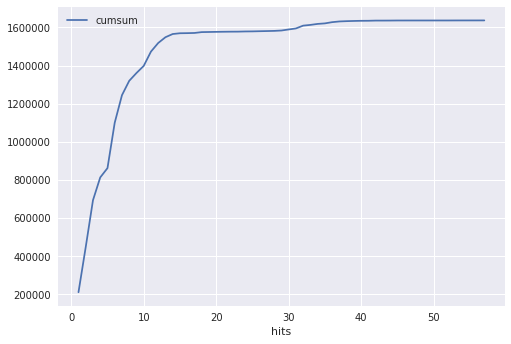

In [99]:
pd_sorted_official_NOT_cleaned_pd.plot(x='hits', y='cumsum')

In [100]:
sns.distplot(pd_sorted_official_NOT_cleaned_pd['count(1)'])

In [101]:
df_hits_cleaned = spark.sql("SELECT hits, count(*) \
                     FROM final \
                     WHERE clientState != 'ALREADY_DONE' \
                     GROUP BY  hits \
                     ORDER BY 2 DESC")
df_hits_cleaned_pd = df_hits_cleaned.toPandas()
pd_sorted_cleaned_pd = df_hits_cleaned_pd.sort_values('hits')
pd_sorted_cleaned_pd['cumsum'] = pd_sorted_cleaned_pd['count(1)'].cumsum(axis=0)
pd_sorted_cleaned_pd

hits  count(1)   cumsum
0    1     940184    940184 
1    2     642288    1582472
2    3     361155    1943627
3    4     240293    2183920
4    5     163689    2347609
5    6     146785    2494394
6    7     103916    2598310
7    8     75089     2673399
8    9     59624     2733023
10   10    57632     2790655
9    11    58123     2848778
11   12    53647     2902425
12   13    44819     2947244
13   14    36612     2983856
17   15    19051     3002907
20   16    9355      3012262
21   17    8309      3020571
14   18    20524     3041095
15   19    19663     3060758
23   20    7578      3068336
16   21    19591     3087927
18   22    14861     3102788
27   23    4550      3107338
22   24    7905      3115243
34   25    2984      3118227
37   26    2042      3120269
36   27    2053      3122322
24   28    6891      3129213
33   29    2986      3132199
31   30    3844      3136043
29   31    3992      3140035
19   32    9611      3149646
32   33    3314      3152960
28   34    4342      3157302
30   35    3941      3161243
25   36    5871      3167114
26   37    4823      3171937
41   38    1634      3173571
45   39    1236      3174807
42   40    1523      3176330
44   41    1245      3177575
40   42    1690      3179265
50   43    1015      3180280
56   44    779       3181059
49   45    1018      3182077
57   46    711       3182788
55   47    782       3183570
38   48    1936      3185506
60   49    649       3186155
70   50    548       3186703
74   51    478       3187181
58   52    708       3187889
54   53    899       3188788
47   54    1034      3189822
39   55    1818      3191640
35   56    2643      3194283
48   57    1029      3195312
66   58    579       3195891
59   59    656       3196547
64   60    589       3197136
85   61    404       3197540
97   62    295       3197835
103  63    271       3198106
107  64    246       3198352
106  65    260       3198612
124  66    210       3198822
161  67    127       3198949
108  68    245       3199194
111  69    234       3199428
79   70    430       3199858
153  71    144       3200002
83   72    416       3200418
76   73    471       3200889
164  74    121       3201010
121  75    216       3201226
110  76    234       3201460
162  77    127       3201587
138  78    178       3201765
174  79    98        3201863
96   80    315       3202178
131  81    194       3202372
135  82    184       3202556
177  83    87        3202643
148  84    156       3202799
139  85    176       3202975
127  86    206       3203181
99   87    293       3203474
61   88    605       3204079
69   89    559       3204638
71   90    547       3205185
68   91    564       3205749
67   92    569       3206318
123  93    212       3206530
82   94    426       3206956
95   95    317       3207273
100  96    291       3207564
78   97    432       3207996
80   98    429       3208425
105  99    268       3208693
165  100   120       3208813
102  101   283       3209096
84   102   416       3209512
182  103   53        3209565
53   104   899       3210464
77   105   459       3210923
120  106   217       3211140
180  107   81        3211221
92   108   329       3211550
144  109   160       3211710
293  110   2         3211712
132  111   192       3211904
146  112   158       3212062
317  113   1         3212063
145  114   158       3212221
181  115   71        3212292
122  116   215       3212507
199  118   31        3212538
179  119   83        3212621
89   121   360       3212981
173  122   99        3213080
168  123   103       3213183
171  124   101       3213284
178  126   87        3213371
112  127   233       3213604
134  128   184       3213788
116  129   227       3214015
136  130   179       3214194
169  131   102       3214296
125  132   207       3214503
176  133   90        3214593
160  134   133       3214726
130  135   199       3214925
115  136   227       3215152
128  137   204       3215356
175  138   95        3215451
119  142   219       3215670
172  143   100       3215770
170

In [102]:
pd_sorted_cleaned_pd.plot(x='hits', y='cumsum')

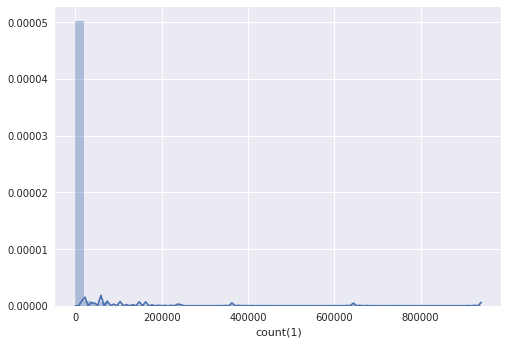

In [103]:
sns.distplot(pd_sorted_cleaned_pd['count(1)'])

In [104]:
df_ps_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps_final.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        362           0          0              

   filename  hostname  protocol  remoteSite  scope  traceId  traceIp  \
0  0         2         4892728   4892728     0      0        0         

   traceTimeentry  traceTimeentryUnix  transferEnd  transferStart  uuid  hits  \
0  0               0                   545963       2183           0     0      

   filesize_double  
0  0

In [105]:
#df_ps_final = df_ps_final.drop('protocol','remoteSite','transferEnd')
#df_ps_final = df_ps_final.dropna()

In [106]:
#df_ps_final.count()

In [107]:
#df_ps_final_official.count()

In [108]:
#df_ps_final_official.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps_final_official.columns]).limit(10).toPandas()

In [109]:
#df_ps_final_official = df_ps_final_official.drop('protocol','remoteSite','transferEnd')
#df_ps_final_official = df_ps_final_official.dropna()

In [110]:
#df_ps_final_official.count()

In [111]:
df_ps_final_official.createOrReplaceTempView("final_official")

df_hits_official_cleaned = spark.sql("SELECT hits, count(*) \
                     FROM final_official \
                     WHERE clientState != 'ALREADY_DONE'\
                     GROUP BY hits")
df_hits_official_cleaned_pd = df_hits_official_cleaned.toPandas()

In [112]:
pd.set_option("display.max_rows",1900)
pd_sorted_official_cleaned = df_hits_official_cleaned_pd.sort_values('hits')
pd_sorted_official_cleaned['cumsum'] = pd_sorted_official_cleaned['count(1)'].cumsum(axis=0)
pd_sorted_official_cleaned

hits  count(1)  cumsum
23  1     199484    199484
34  2     135895    335379
27  3     131027    466406
35  4     46618     513024
22  5     18526     531550
13  6     53723     585273
5   7     34480     619753
31  8     20926     640679
14  9     16149     656828
24  10    15860     672688
32  11    28812     701500
29  12    22135     723635
36  13    16515     740150
39  14    6654      746804
41  15    2786      749590
48  16    387       749977
18  17    774       750751
38  18    4293      755044
2   19    538       755582
46  20    382       755964
40  21    176       756140
4   22    185       756325
45  23    138       756463
51  24    765       757228
12  25    241       757469
1   26    425       757894
15  27    344       758238
21  28    500       758738
0   29    606       759344
43  30    1132      760476
10  31    1925      762401
8   32    5455      767856
20  33    1459      769315
6   34    2087      771402
33  35    1231      772633
37  36    3747      776380
28  37    1828      778208
42  38    806       779014
11  39    586       779600
47  40    678       780278
19  41    129       780407
44  42    904       781311
9   43    11        781322
26  44    176       781498
49  45    260       781758
25  48    48        781806
17  52    7         781813
50  53    48        781861
3   54    20        781881
30  55    12        781893
16  56    12        781905
7   57    27        781932

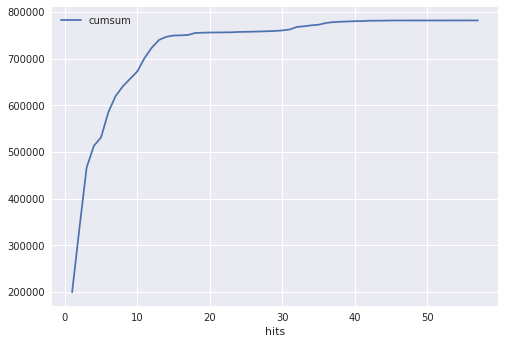

In [113]:
pd_sorted_official_cleaned.plot(x='hits', y='cumsum')

In [114]:
df_ps_final.createOrReplaceTempView("final")
df_hits_cleaned = spark.sql("SELECT hits, count(*) \
                     FROM final \
                     WHERE clientState != 'ALREADY_DONE'\
                     GROUP BY hits")
df_hits_cleaned_pd = df_hits_cleaned.toPandas()

In [115]:
pd.set_option("display.max_rows",1900)
pd_sorted_cleaned = df_hits_cleaned_pd.sort_values('hits')
pd_sorted_cleaned['cumsum'] = pd_sorted_cleaned['count(1)'].cumsum(axis=0)
pd_sorted_cleaned

hits  count(1)   cumsum
123  1     940184    940184 
215  2     642288    1582472
183  3     361155    1943627
233  4     240293    2183920
122  5     163689    2347609
68   6     146785    2494394
24   7     103916    2598310
199  8     75089     2673399
82   9     59624     2733023
134  10    57632     2790655
205  11    58123     2848778
190  12    53647     2902425
237  13    44819     2947244
250  14    36612     2983856
262  15    19051     3002907
308  16    9355      3012262
99   17    8309      3020571
245  18    20524     3041095
8    19    19663     3060758
288  20    7578      3068336
255  21    19591     3087927
21   22    14861     3102788
283  23    4550      3107338
323  24    7905      3115243
55   25    2984      3118227
1    26    2042      3120269
85   27    2053      3122322
110  28    6891      3129213
0    29    2986      3132199
274  30    3844      3136043
46   31    3992      3140035
42   32    9611      3149646
109  33    3314      3152960
26   34    4342      3157302
208  35    3941      3161243
240  36    5871      3167114
185  37    4823      3171937
268  38    1634      3173571
50   39    1236      3174807
299  40    1523      3176330
108  41    1245      3177575
276  42    1690      3179265
43   43    1015      3180280
164  44    779       3181059
318  45    1018      3182077
286  46    711       3182788
320  47    782       3183570
147  48    1936      3185506
206  49    649       3186155
34   50    548       3186703
88   51    478       3187181
96   52    708       3187889
319  53    899       3188788
9    54    1034      3189822
194  55    1818      3191640
87   56    2643      3194283
39   57    1029      3195312
74   58    579       3195891
257  59    656       3196547
296  60    589       3197136
175  61    404       3197540
202  62    295       3197835
84   63    271       3198106
309  64    246       3198352
2    65    260       3198612
218  66    210       3198822
148  67    127       3198949
70   68    245       3199194
249  69    234       3199428
289  70    430       3199858
63   71    144       3200002
71   72    416       3200418
275  73    471       3200889
196  74    121       3201010
241  75    216       3201226
229  76    234       3201460
25   77    127       3201587
244  78    178       3201765
100  79    98        3201863
211  80    315       3202178
263  81    194       3202372
269  82    184       3202556
189  83    87        3202643
44   84    156       3202799
140  85    176       3202975
293  86    206       3203181
72   87    293       3203474
111  88    605       3204079
135  89    559       3204638
278  90    547       3205185
312  91    564       3205749
234  92    569       3206318
298  93    212       3206530
33   94    426       3206956
59   95    317       3207273
126  96    291       3207564
271  97    432       3207996
49   98    429       3208425
291  99    268       3208693
155  100   120       3208813
186  101   283       3209096
230  102   416       3209512
103  103   53        3209565
131  104   899       3210464
157  105   459       3210923
142  106   217       3211140
81   107   81        3211221
163  108   329       3211550
295  109   160       3211710
38   110   2         3211712
141  111   192       3211904
17   112   158       3212062
15   113   1         3212063
120  114   158       3212221
125  115   71        3212292
54   116   215       3212507
236  118   31        3212538
47   119   83        3212621
285  121   360       3212981
259  122   99        3213080
170  123   103       3213183
58   124   101       3213284
29   126   87        3213371
169  127   233       3213604
139  128   184       3213788
258  129   227       3214015
23   130   179       3214194
158  131   102       3214296
165  132   207       3214503
273  133   90        3214593
227  134   133       3214726
256  135   199       3214925
40   136   227       3215152
254  137   204       3215356
116  138   95        3215451
150  142   219       3215670
65   143   100       3215770
41 

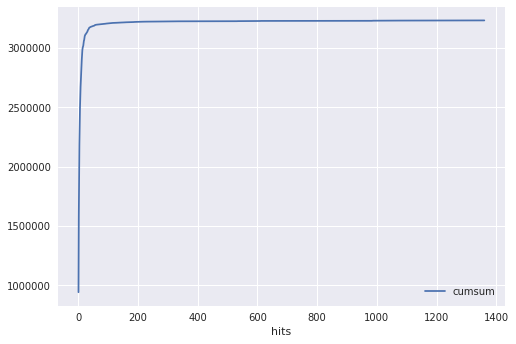

In [116]:
pd_sorted_cleaned.plot(x='hits', y='cumsum')